In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# 1. 데이터 로드 및 전처리
df = pd.read_csv('C:/dataset/abalone.csv')

In [3]:
df

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [4]:
# Sex 원-핫 인코딩
df = pd.get_dummies(df, columns=['Sex'])

In [5]:
# 특성과 타겟 분리
X = df.drop(['Rings', 'id'], axis=1)
y = df['Rings']

In [7]:
# 이상치 제거
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [8]:
# 주요 특성들에 대해 이상치 제거
columns_to_clean = ['Length', 'Diameter', 'Height', 'Whole_weight', 'Rings']
for column in columns_to_clean:
    df = remove_outliers(df, column)

In [9]:
# 스케일링
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

In [10]:
# CNN 입력을 위한 reshape
X_reshaped = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

In [11]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X_reshaped, y_scaled, test_size=0.2, random_state=42
)

In [12]:
# 2. CNN 모델 구성
model = Sequential([
    # 첫 번째 CNN 블록
    Conv1D(64, 2, activation='relu', input_shape=(X_train.shape[1], 1)),
    BatchNormalization(),
    MaxPooling1D(2),
    Dropout(0.2),
    
    # 두 번째 CNN 블록
    Conv1D(128, 2, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(2),
    Dropout(0.3),
    
    # Dense 레이어
    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1)
])

C:\Users\김경환\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# 3. 모델 컴파일
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

In [14]:
# 4. 모델 학습
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 1.2621 - mae: 0.8548 - val_loss: 0.7812 - val_mae: 0.6605
Epoch 2/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.9169 - mae: 0.7308 - val_loss: 0.7021 - val_mae: 0.5992
Epoch 3/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.8090 - mae: 0.6799 - val_loss: 0.6420 - val_mae: 0.5817
Epoch 4/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.7652 - mae: 0.6450 - val_loss: 0.5652 - val_mae: 0.5471
Epoch 5/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.6853 - mae: 0.6224 - val_loss: 0.5426 - val_mae: 0.5348
Epoch 6/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.6997 - mae: 0.6252 - val_loss: 0.5556 - val_mae: 0.5196
Epoch 7/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.6247 - mae: 0.5857 - val_loss: 0.5197 - val_mae: 0.5088
Epoch 8/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.6039 - mae: 0.5782 - val_loss: 0.5133 - val_mae: 0.5101
Epoch 9/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - lo

In [15]:
# 5. 모델 평가
y_pred_scaled = model.predict(X_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [16]:
# 예측값을 원래 스케일로 변환
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_orig = scaler_y.inverse_transform(y_test)

In [17]:
# 성능 지표 계산
mse = mean_squared_error(y_test_orig, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_orig, y_pred)

In [18]:
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R2 Score: {r2:.4f}')

MSE: 4.9656
RMSE: 2.2284
R2 Score: 0.5413


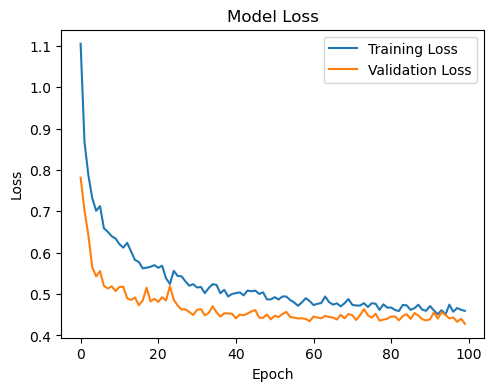

In [19]:
# 6. 학습 과정 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Loss 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

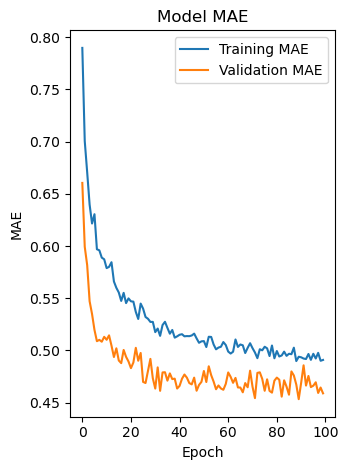

In [20]:
# MAE 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()